## [Anime Recommendation Database 2020] (https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020/code)
HERNAN VALDIVIESO, Pontificia Universidad Catolica de Chile

### Description
MyAnimeList Database 2020
Recommendation data from 320.0000 users and 16.000 animes at myanimelist.net

This dataset contains information about 17.562 anime and the preference from 325.772 different users. In particular, this dataset contain:

The anime list per user. Include dropped, complete, plan to watch, currently watching and on hold.
Ratings given by users to the animes that they has watched completely.
Information about the anime like genre, stats, studio, etc.
HTML with anime information to do data scrapping. These files contain information such as reviews, synopsis, information about the staff, anime statistics, genre, etc.

The goal is to create a system that generates personalized recommendations for all users, including those who do not have any viewing history in the training set. The guidelines for this project are as follows:
1. Split the dataset into training and test sets, using an appropriate ratio.
2. Develop a recommendation system capable of generating 20 recommendations per user.
3. The recommendations should be in terms of "anime id" (anime identifier) and should be for those that the user has not yet seen according to the training set data.


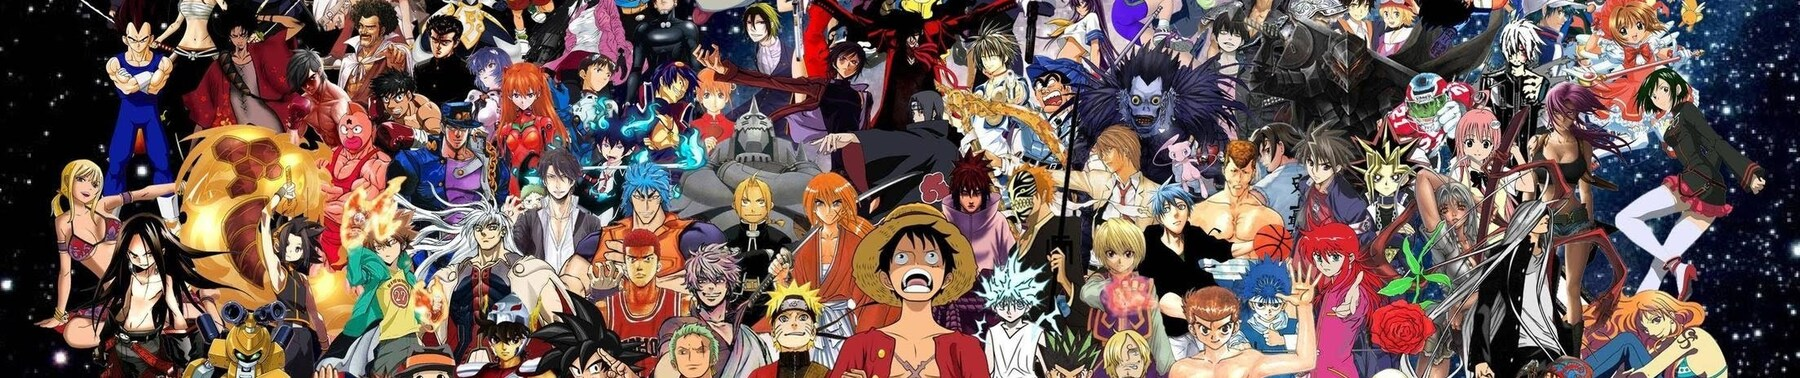

In [4]:
# Reading Dataset
import numpy as np
import pandas as pd
# Visualization
import plotly.express as px
import plotly.graph_objects as go  # for 3D plot visualization
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from langdetect import detect
from datetime import datetime


In [5]:
#Limpieza de datos
from sklearn.preprocessing import LabelEncoder

# Reading our Datasets (5)

In [6]:
# Setting column display to 50
pd.set_option('display.max_columns', 50)

In [7]:
# Importando detalles anime dataframe
# It contain general information of every anime (17.562 different anime) like genre, stats, studio, etc.
df_anime_details=pd.read_csv('C:/Users/LG/aider/dataset2020/anime_1000.csv')
print("Shape of the Dataset:",df_anime_details.shape)
df_anime_details.head(4)

Shape of the Dataset: (1000, 35)


,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0


In [8]:
# Importando anime synopsis dataframe
df_synopsis=pd.read_csv('C:/Users/LG/aider/dataset2020/anime_with_synopsis_1000.csv')
print("Shape of the Dataset:",df_synopsis.shape)
df_synopsis.head()

Shape of the Dataset: (1000, 5)


,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


In [9]:
# Corregir el nombre de la columna 'sypnopsis' a 'Synopsis'
df_synopsis.rename(columns={'sypnopsis': 'Synopsis'}, inplace=True)
df_synopsis.head()


,MAL_ID,Name,Score,Genres,Synopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


In [10]:
# Importando animelist dataframe
#It have the list of all animes register by the user with the respective score, 
#watching status and numbers of episodes watched

df_animelist=pd.read_csv('C:/Users/LG/aider/dataset2020/animelist_1000.csv')
print("Shape of the dataset:",df_animelist.shape)
df_animelist.head()

Shape of the dataset: (1000, 5)


,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0


In [11]:
# Importando rating dataframe
# is a subset of animelist.csv. This dataset only considers animes that the user has watched completely (watching_status==2)
# and gave it a score (score!=0). This dataset contains 57 Million ratings applied to 16.872 animes by 310.059 users

df_rating=pd.read_csv('C:/Users/LG/aider/dataset2020/rating_complete_1000.csv')
print("Shape of the dataset:",df_rating.shape)
df_rating.head()

Shape of the dataset: (1000, 3)


,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


In [12]:
# Importando watching_status dataframe
# describe every possible status of the column: "watching_status" in animelist.csv.
df_watching_status=pd.read_csv('C:/Users/LG/aider/dataset2020/watching_status.csv')
print("Shape of the dataset:",df_watching_status.shape)
df_watching_status.head()

Shape of the dataset: (5, 2)


,status,description
0,1,Currently Watching
1,2,Completed
2,3,On Hold
3,4,Dropped
4,6,Plan to Watch


# Relevance Analysis of Data


We will establish the columns that will be included in our recommendation system and those that will be discarded, taking into account the MAP performance metric.


## For anime.csv

**Include:**

- MAL_ID: To uniquely identify each anime.
- Name: The name of the anime. It acts as a description to present the recommended anime to the user.
- Score: Average rating of the anime. It's a measure of quality/popularity that allows for ranking and filtering content for recommendation.
- Genres: Essential for recommendations based on genre preferences.
- Type: Can influence user preference (series, movie, OVA, etc.). This contextual information helps to better understand the content characteristics.
- Episodes: May be relevant for users who prefer shorter or longer series.
- Rating: Age classification, crucial for recommending appropriate content.
- Members: An indicator of the anime's popularity and acceptance in the community.

**Exclude:**

- English name and Japanese name: Not necessary, as Name is sufficient.
- Aired and Premiered: Less relevant for predicting preferences.
- Producers / Licensors / Studios / Source / Duration: These are overly specific details of the anime that also have little relevance for recommendation.
- Ranked / Popularity / Favorites / Watching / Completed / On-Hold / Dropped / Plan to Watch: These data could be considered to understand popularity, but might not be as crucial for the MAP.
- Score-10 to Score-1: The average score, Score, is sufficient for analysis.


## For anime_with_synopsis.csv:
**Include:**

- MAL_ID / Name / Score / Genres = already considered in anime.csv


## Synopsis Column Analysis

**Arguments to keep "synopsis":**

1) Content-Based Filtering: The synopsis of an anime is a rich source of textual information that can be used for content-based filtering techniques. By analyzing the synopsis, important content features such as themes, settings, or plot elements can be extracted, which may not be captured in other fields like genre.

2) Natural Language Processing (NLP): With advances in NLP, techniques such as sentiment analysis, named entity recognition, or text vectorization (e.g., TF-IDF or word embeddings) can be used to capture the essence of the synopsis and use it to recommend animes similar to users in terms of narrative style.

3) Cold Start: For new users or animes with few ratings, the synopsis can be useful for making initial recommendations before there is enough interaction data.

**Arguments to remove "synopsis":**

1) Additional Complexity: Including text analysis adds complexity to the model. It may require significant processing and specialized knowledge in NLP, as well as increased processing time.

2) Potential Biases: The interpretation of the synopsis might be subject to subjective biases, and it could be challenging to capture the variety and subtleties of anime plots and characters through text alone.

3) Relevance to the Model: If your model is primarily focused on collaborative filtering and user-anime interactions, then the synopsis may not be as relevant and could be discarded to simplify the model.

Given that the goal is to create a system that generates personalized recommendations for all users, including those without viewing history, the "synopsis" column could be very valuable, especially for content-based filtering and addressing the cold start problem. Consequently, we will keep the "synopsis" column in the model.


## For animelist.csv:

**Include:**

- user_id: To associate data with the specific user.
- anime_id: To link with the anime information.
- score: As a reflection of the user's rating.
- watching_status: To filter animes in the training and test set.

**Exclude:**

- watched_episodes: May be redundant if the viewing status is complete.


## For rating_complete.csv:

**Include:**
All columns (user_id, anime_id, rating): They are crucial for the training and evaluation of the recommendation model.


## For watching_status.csv:

**Include:**
status and description: To interpret viewing statuses and filter recommendations.


# Preliminary Exploratory Analysis


We will analyze animelist.csv to determine if we should focus our model on users who have watched more animes. Filtering to include only those users who have watched the most animes could have both advantages and disadvantages for the MAP performance metric.

Advantages:

a) Rich User Data: Users who have watched many animes can provide richer and more consistent rating data, which could potentially improve the quality of recommendations by modeling more clearly defined preferences.

b) Noise Reduction: By limiting the dataset to highly active users, it could reduce the noise caused by users with few interactions, which might improve the accuracy of the recommendation system.

c) Computational Efficiency: Working with a subset of the full dataset can be more manageable and computationally efficient, allowing for faster experimentation and tuning of the recommendation model.

Disadvantages:

a) Active User Bias: This could introduce a bias toward the tastes and preferences of the most active users, which does not necessarily represent the diversity of the complete set of users.

b) Loss of Diversity: Excluding users with fewer interactions may result in the loss of valuable data that could contribute to the diversity of recommendations.

c) Generalization: A model trained on this subset might not generalize well to all users, especially those new or less active.


In [13]:
# Paso 1: Cargar el CSV (el original de 1,8Gb)
animelist_full = pd.read_csv('C:/Users/LG/aider/dataset2020/full/animelist.csv')
print("Archivo cargado con éxito.")


Archivo cargado con éxito.


In [14]:
# Paso 2: Contar Animes por Usuario
user_anime_counts = animelist_full.groupby('user_id')['anime_id'].nunique().reset_index(name='anime_count')
print("Conteo de animes por usuario realizado.")

Conteo de animes por usuario realizado.


In [15]:
print(user_anime_counts.head())  # Imprime los primeros registros para verificar

   user_id  anime_count
0        0           74
1        1          139
2        2          494
3        3          358
4        4          156


In [16]:
print("Conteo de animes por usuario realizado. Total de usuarios:", len(user_anime_counts))

Conteo de animes por usuario realizado. Total de usuarios: 325770


In [17]:
print(f"Total de usuarios únicos: {user_anime_counts['user_id'].nunique()}")

Total de usuarios únicos: 325770


In [18]:
# Guardamos este conteo en un archivo CSV para análisis externo
user_anime_counts.to_csv('C:/Users/LG/aider/dataset2020/full/user_anime_counts.csv', index=False)
print("El conteo de animes por usuario ha sido guardado en 'user_anime_counts.csv'.")

El conteo de animes por usuario ha sido guardado en 'user_anime_counts.csv'.


In [19]:
# Paso 3: Estadísticas Descriptivas
anime_count_stats = user_anime_counts['anime_count'].describe()
print("Estadísticas descriptivas de animes por usuario:")
print(anime_count_stats)

Estadísticas descriptivas de animes por usuario:
count    325770.000000
mean        335.281782
std         425.411063
min           1.000000
25%          96.000000
50%         224.000000
75%         436.000000
max       17546.000000
Name: anime_count, dtype: float64


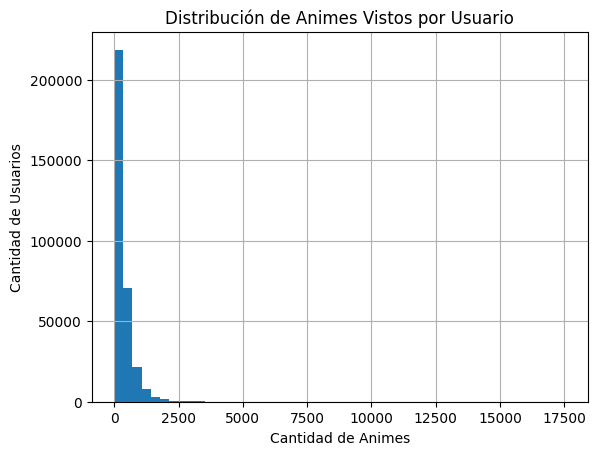

Histograma generado.


In [20]:
# Paso 4: Histograma
user_anime_counts['anime_count'].hist(bins=50)
plt.title('Distribución de Animes Vistos por Usuario')
plt.xlabel('Cantidad de Animes')
plt.ylabel('Cantidad de Usuarios')
plt.show()
print("Histograma generado.")

In [21]:
# Paso 5: Determinar Umbral
# Aquí se está calculando el percentil 75 como ejemplo.
umbral = user_anime_counts['anime_count'].quantile(0.75)
print(f"El umbral establecido (percentil 75) es: {umbral}")

El umbral establecido (percentil 75) es: 436.0


In [22]:
# Filtrar usuarios que han visto más animes que el umbral
usuarios_seleccionados = user_anime_counts[user_anime_counts['anime_count'] > umbral]
print(f"Se han seleccionado {len(usuarios_seleccionados)} usuarios que han visto más animes que el umbral.")

Se han seleccionado 81289 usuarios que han visto más animes que el umbral.


In [23]:
# Calcula el porcentaje de estos usuarios con respecto al total.
porcentaje_usuarios = (len(usuarios_seleccionados) / len(user_anime_counts)) * 100

print(f"El {porcentaje_usuarios:.2f}% de los usuarios ha visto más animes que el umbral de {umbral} animes.")

El 24.95% de los usuarios ha visto más animes que el umbral de 436.0 animes.


# Conclusion of the Preliminary Exploratory Analysis


1) From the results of Step 3, it is observed that the average number of animes watched per user is approximately 335, with one user having watched a maximum of 17,546 animes.

2) From Step 5, the set threshold (75th percentile) is 436 animes. This means that 25% of users have watched more than 436 animes.

At first glance, with this information, we could conclude that focusing the recommendation system on this subset of users could provide more consistent data for the model, as these users have interacted with a significant number of animes. Additionally, by working with users with more extensive viewing histories, the recommendations could be more accurate and personalized, which could potentially improve the MAP metric.

**BUT...**

The goal of the project is to create a recommendation system that is inclusive and works for all users, including those without a viewing history, so we will NOT exclusively filter by users who have watched the most animes.

Instead, we will use the following strategies:

a) Hybrid Approach: We will use a hybrid recommendation system that combines collaborative filtering techniques with content-based methods. This allows making recommendations for users with rich histories while using the content characteristics of animes to recommend to new users or those with fewer interactions.

b) Cold Start: We will implement specific strategies for the cold start problem, such as recommending popular or highly rated animes to new users, or using demographic information if available.

c) Inclusion of New Users: We will ensure that the model can handle users with few or no previous ratings. This might involve techniques such as data imputation or models that explicitly handle the absence of data.

d) Analysis of Less Active Users: Exploring the data of less active users can reveal preference patterns that are not evident in more active users.

e) Stratified Cross-Validation: During the training and validation phase, we will ensure that less active users are represented in similar proportions in each fold of cross-validation.

f) Diversification of Recommendations: We will consider the diversification of recommendations to improve content exploration and user satisfaction.

g) Robust Evaluation: We will use an evaluation metric that considers both accuracy and coverage and test the model with users of different activity levels.

h) A/B Testing: We will perform A/B tests to compare different recommendation strategies and select the one that works best in terms of user engagement and satisfaction.

By applying these strategies, a recommendation system could be built that is not only precise for active users but also capable of providing valuable recommendations for those with limited or nonexistent viewing histories.


# Data Cleaning and Preparation Plan

## Objective
The objective of this plan is to clean and prepare the data from the provided CSV files for the construction of an anime recommendation system. The plan focuses on including the relevant columns and excluding those that do not contribute to our objectives, according to the previous analysis.

## Files and Columns to Include/Exclude
The files and their respective columns are:

- `anime.csv`
  - **Include**: `MAL_ID`, `Name`, `Score`, `Genres`, `Type`, `Episodes`, `Rating`, `Members`.
  - **Exclude**: `English name`, `Japanese name`, `Aired`, `Premiered`, `Producers`, `Licensors`, `Studios`, `Source`, `Duration`, `Ranked`, `Popularity`, `Favorites`, `Watching`, `Completed`, `On-Hold`, `Dropped`, `Plan to Watch`, `Score-10` to `Score-1`.

- `anime_with_synopsis.csv`
  - **Include**: `Synopsis`.
  - **Exclude**: `MAL_ID`, `Name`, `Score`, `Genres`. (these are already included in anime.csv)

- `animelist.csv`
  - **Include**: `user_id`, `anime_id`, `rating`, `watching_status`.
  - **Exclude**: `watched_episodes`.

- `rating_complete.csv`
  - **Include**: All columns (`user_id`, `anime_id`, `rating`).

- `watching_status.csv`
  - **Include**: All columns (`status`, `description`).


### Step 1: Data Loading
(previously loaded)


### Step 2: Column Cleaning

We will remove the unnecessary columns from each dataset to simplify their handling and focus on the relevant information.


In [24]:
# Limpieza de columnas en 'df_anime_details'
anime_data = df_anime_details[['MAL_ID', 'Name', 'Score', 'Genres', 'Type', 'Episodes', 'Rating', 'Members']]

# Limpieza de columnas en 'df_animelist'
animelist_data = df_animelist[['user_id', 'anime_id', 'rating', 'watching_status']]

# 'df_rating' y 'df_watching_status' ya contienen solo las columnas deseadas
rating_complete_data = df_rating
watching_status_data = df_watching_status



### Paso 3: Integración de 'anime_data' y 'df_synopsis'

Combinaremos 'anime_data' y 'df_synopsis' para tener la información del anime y su sinopsis en un solo lugar, utilizando 'MAL_ID' como clave.


In [25]:
# Combinar 'anime_data' con 'df_synopsis'
combined_anime_data = pd.merge(anime_data, df_synopsis[['MAL_ID', 'Synopsis']], on='MAL_ID', how='left')
print("Shape of the Dataset:",combined_anime_data.shape)
combined_anime_data.head(10)

Shape of the Dataset: (1000, 9)


,MAL_ID,Name,Score,Genres,Type,Episodes,Rating,Members,Synopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,R - 17+ (violence & profanity),1251960,"In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,R - 17+ (violence & profanity),273145,"other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,PG-13 - Teens 13 or older,558913,"Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,PG-13 - Teens 13 or older,94683,ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52,PG - Children,13224,It is the dark century and the people are suff...
5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",TV,145,PG-13 - Teens 13 or older,148259,Sena is like any other shy kid starting high s...
6,16,Hachimitsu to Clover,8.06,"Comedy, Drama, Josei, Romance, Slice of Life",TV,24,PG-13 - Teens 13 or older,214499,"Yuuta Takemoto, a sophomore at an arts college..."
7,17,Hungry Heart: Wild Striker,7.59,"Slice of Life, Comedy, Sports, Shounen",TV,52,PG-13 - Teens 13 or older,20470,Kyosuke Kano has lived under the shadow of his...
8,18,Initial D Fourth Stage,8.15,"Action, Cars, Sports, Drama, Seinen",TV,24,PG-13 - Teens 13 or older,117929,Takumi Fujiwara finally joins Ryousuke and Kei...
9,19,Monster,8.76,"Drama, Horror, Mystery, Police, Psychological,...",TV,74,R+ - Mild Nudity,614100,"Dr. Kenzou Tenma, an elite neurosurgeon recent..."


### Paso 4:  Preparación de 'animelist_data'

In [26]:
# Conservar solo las columnas relevantes
animelist_data = df_animelist[['user_id', 'anime_id', 'rating', 'watching_status']]

### Paso 5:  Preparación de 'rating_complete_data' y 'watching_status_data'

In [27]:
# 'rating_complete_data' ya tiene las columnas relevantes
# 'watching_status_data' también ya tiene las columnas relevantes


### Paso 6:  Manejo de Valores Faltantes y Verificación de Tipos de Datos

In [28]:
# Rellenar valores faltantes en 'Synopsis' con cadenas vacías
combined_anime_data['Synopsis'].fillna('', inplace=True)

# Convertir 'Episodes' a enteros, manejar posibles valores no numéricos
combined_anime_data['Episodes'] = pd.to_numeric(combined_anime_data['Episodes'], errors='coerce').fillna(0).astype(int)

# Manejar valores faltantes en 'animelist_data'
animelist_data.dropna(inplace=True)

# No se necesita manejo adicional para 'rating_complete_data' y 'watching_status_data' en este momento


### Paso 7:  Integración de Todos los Datos

In [29]:
# Integración de 'combined_anime_data' con 'animelist_data'
full_data = pd.merge(combined_anime_data, animelist_data, left_on='MAL_ID', right_on='anime_id', how='left')

# Integración de 'full_data' con 'rating_complete_data'
full_data = pd.merge(full_data, rating_complete_data, on=['user_id', 'anime_id'], how='left')

# Integración de 'full_data' con 'watching_status_data'
full_data = pd.merge(full_data, watching_status_data, left_on='watching_status', right_on='status', how='left')

# Limpieza final de los datos
full_data.drop_duplicates(inplace=True)
full_data.ffill(inplace=True)  # Aplicación directa de ffill() para rellenar valores faltantes

# Visualización de las primeras filas para verificar la integración
print("Shape of the Dataset:",full_data.shape)
full_data.head(5)

Shape of the Dataset: (1020, 16)


,MAL_ID,Name,Score,Genres,Type,Episodes,Rating,Members,Synopsis,user_id,anime_id,rating_x,watching_status,rating_y,status,description
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,R - 17+ (violence & profanity),1251960,"In the year 2071, humanity has colonized sever...",3.0,1.0,9.0,2.0,9.0,2.0,Completed
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,R - 17+ (violence & profanity),273145,"other day, another bounty—such is the life of ...",3.0,1.0,9.0,2.0,9.0,2.0,Completed
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,PG-13 - Teens 13 or older,558913,"Vash the Stampede is the man with a $$60,000,0...",3.0,1.0,9.0,2.0,9.0,2.0,Completed
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,PG-13 - Teens 13 or older,94683,ches are individuals with special powers like ...,3.0,1.0,9.0,2.0,9.0,2.0,Completed
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52,PG - Children,13224,It is the dark century and the people are suff...,3.0,1.0,9.0,2.0,9.0,2.0,Completed


We observe that there are three columns related to the rating:
- **Score**: This is the average rating that the anime has received from all users in the MyAnimeList database. For example, for "Cowboy Bebop" it is 8.78.

- **rating_x**: This rating comes from the animelist.csv dataset and represents the rating given by a specific user to the anime. It can be 0 if the user did not assign a score. In row 9, this rating is 0.0.

- **rating_y**: This rating comes from the rating_complete.csv dataset, which is a subset of animelist.csv. It only considers animes that the user has completely watched and rated. In row 9, this rating is 8.0.

The objective is to personalize recommendations based on individual users' ratings, so we need to consider rating_x or rating_y. Here, rating_y could be more relevant since it reflects ratings from users who completed the anime, indicating a more informed evaluation.

Since rating_complete.csv is a subset of animelist.csv and only includes ratings of completely watched animes, rating_y could be the more robust option for a personalized recommendation system. However, if a user has not completed an anime (for example, if they have only started it or abandoned it), then rating_x would be the only available rating from that user for that anime. In those cases, you might consider using rating_x as a fallback when rating_y is not available.

We will use all three fields effectively to develop a personalized recommendation system that can cater to both users with a history and those without it.


In [30]:
# Verificar valores faltantes
missing_values = full_data.isnull().sum()
missing_values_percentage = (missing_values / len(full_data)) * 100

# Crear un DataFrame para visualizar la cantidad y el porcentaje de valores faltantes por columna
missing_data_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})

print(missing_data_summary)

                 Missing Values  Percentage
MAL_ID                        0         0.0
Name                          0         0.0
Score                         0         0.0
Genres                        0         0.0
Type                          0         0.0
Episodes                      0         0.0
Rating                        0         0.0
Members                       0         0.0
Synopsis                      0         0.0
user_id                       0         0.0
anime_id                      0         0.0
rating_x                      0         0.0
watching_status               0         0.0
rating_y                      0         0.0
status                        0         0.0
 description                  0         0.0


In [31]:
# Verificar si hay valores NaN en todo el DataFrame
nan_values = full_data.isnull().sum()

# Verificar si hay algún valor NaN en el DataFrame
has_nan = full_data.isnull().values.any()

# Imprimir el resultado
print(nan_values)
print("¿El DataFrame tiene algún valor NaN?:", has_nan)

MAL_ID             0
Name               0
Score              0
Genres             0
Type               0
Episodes           0
Rating             0
Members            0
Synopsis           0
user_id            0
anime_id           0
rating_x           0
watching_status    0
rating_y           0
status             0
 description       0
dtype: int64
¿El DataFrame tiene algún valor NaN?: False


In [32]:
# Exportar a CSV
full_data.to_csv('C:/Users/LG/aider/dataset2020/full/full_data.csv', index=False)


## Exploratory Data Analysis (EDA)

In this step, we will perform an Exploratory Data Analysis (EDA) of the `full_data`. This analysis will help us better understand the characteristics and distributions of the data, which is essential for the effective construction of recommendation models. The EDA will include:

1. Analysis of rating distributions.
2. Exploration of genre popularity.
3. Analysis of episode length and anime type.
4. Investigation of any other interesting features in the data.



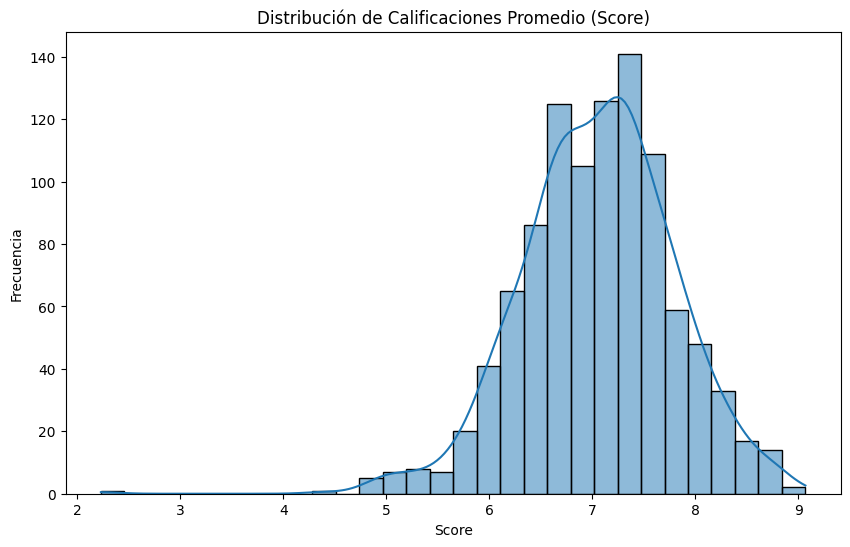

In [33]:
# Análisis básico de distribuciones
# Distribución de las calificaciones promedio (Score)
plt.figure(figsize=(10, 6))
sns.histplot(full_data['Score'], kde=True, bins=30)
plt.title('Distribución de Calificaciones Promedio (Score)')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.show()

- The distribution of ratings is approximately normal with a slight skew to the left, indicating that there are more animes with high ratings than with low ratings.
- Most of the ratings are concentrated around the range of 6 to 8, suggesting that users tend to give positive ratings.
- There are relatively few animes with very low ratings (below 4) or very high ratings (above 9), which might indicate that users are moderate in their extreme ratings or that the dataset does not include many animes with extremely negative or positive perceptions.
- The peak of the distribution is between 7 and 8, which could be considered the 'typical rating' given by users in this dataset.

#### These findings are important for a recommendation system because:

- **Center of the Distribution**: Knowing the most common rating range can be useful for normalizing user ratings and for establishing a benchmark when making recommendations to new users.
- **Tails of the Distribution**: Ratings at the extremes may indicate animes with polarized opinions, which could be of special interest to certain users and which may require different treatment in the recommendation system.
- **Shape of the Distribution**: The shape of the distribution suggests that there is room to differentiate between animes that are above or below average in terms of their reception by users.

These insights can help to adjust our recommendation algorithm to weigh differently average, high, and low ratings, and can also be useful for identifying animes that are significantly more popular or unpopular than average.


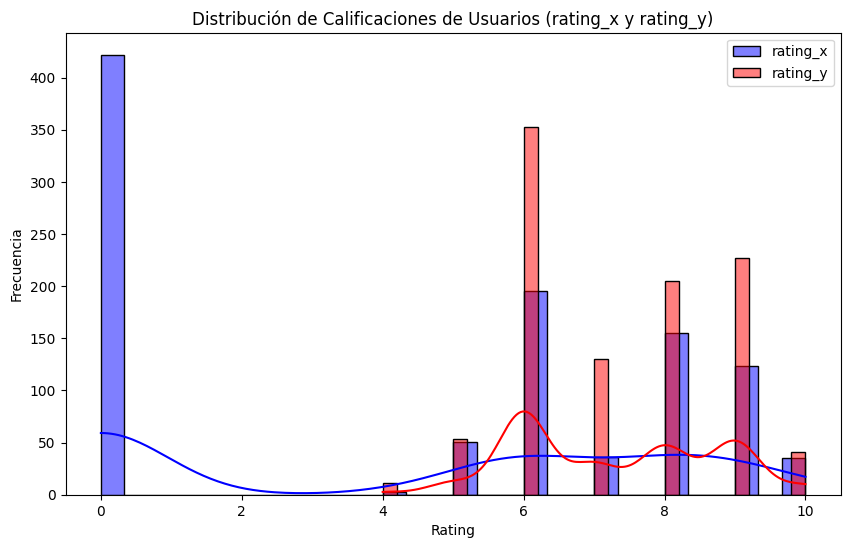

In [34]:
# Distribución de calificaciones de usuarios (rating_x y rating_y)
plt.figure(figsize=(10, 6))
sns.histplot(full_data['rating_x'], kde=True, bins=30, color='blue', alpha=0.5, label='rating_x')
sns.histplot(full_data['rating_y'], kde=True, bins=30, color='red', alpha=0.5, label='rating_y')
plt.title('Distribución de Calificaciones de Usuarios (rating_x y rating_y)')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### Findings from the Rating Analysis

- The distribution of `rating_x` shows a massive concentration at the value 0, which could indicate a large number of unrated entries or possibly missing or reserved values for users who haven't given a rating.
- The distribution of `rating_y` appears more uniformly distributed between 4 and 10, suggesting that these values are actually used by users for rating.
- There are clear peaks at integer values for `rating_y`, especially around 6, 8, and 10, which is common in rating systems where users tend to give whole number ratings instead of decimals.
- The presence of high ratings in `rating_y` is notable, with many animes receiving the highest possible ratings.

- <span style="color:red">**rating_x**:</span> 
  Further investigation is needed to understand why there are so many ratings at 0. If these represent missing data or a conscious decision not to rate, it is crucial for data handling in the recommendation system.
- **rating_y**: This set of ratings seems to reflect a more realistic user behavior trend, with a preference for positive ratings and perfect scores.
- **Implications for the Recommendation System**: Understanding these distributions is critical for modeling user preferences and adjusting how the system interprets different types of ratings. For example, if 0 in `rating_x` does not represent a negative rating but an absence of rating, this should not negatively influence recommendations.

To address the 0 ratings in `rating_x`, the meaning of these data points should be clarified. If they represent missing values, they could be excluded from the analysis or imputed based on some metric, such as the mean of the user's non-zero ratings. If they represent an abstention from rating, they could be treated as separate data reflecting a lack of interaction or interest, which could still be informative for the recommendation system.

This information is essential to design and fine-tune our recommendation algorithm so that it accurately reflects user preferences and ensures that the recommendations are relevant and personalized.


## Exploring Genre Popularity

In this step, we will analyze the popularity of genres in the dataset. This will allow us to understand which genres are most prevalent and can be a good indicator of the general preferences of anime users.


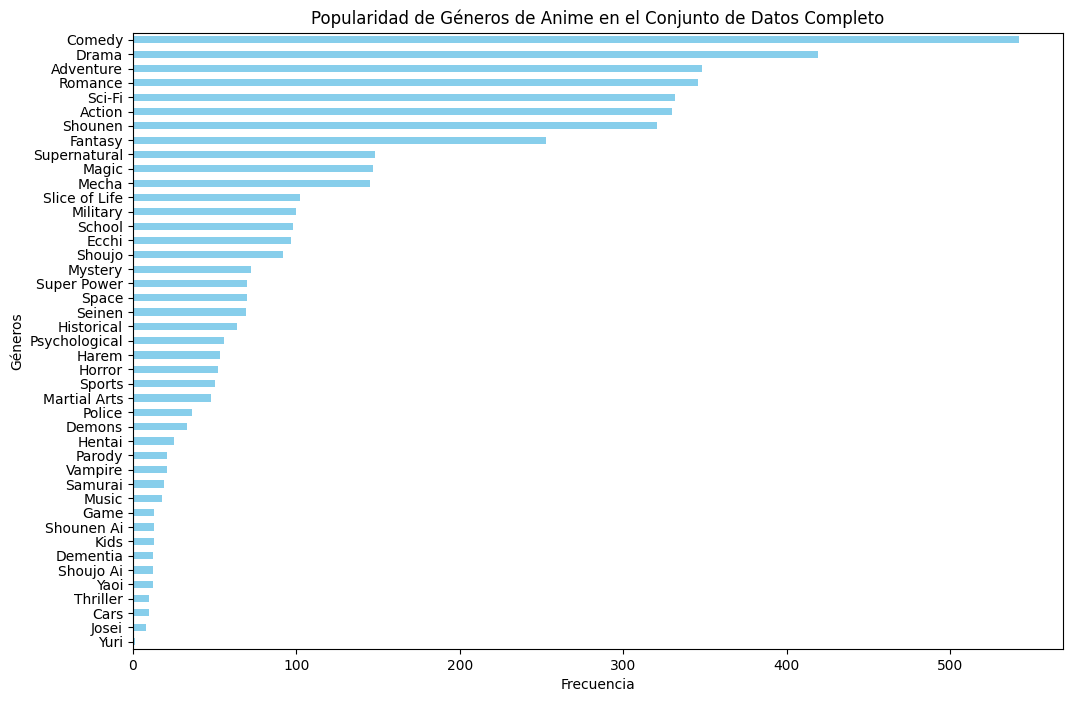

In [35]:
# Preparar los datos de géneros para el conjunto de datos completo
all_genres_full = [genre for sublist in full_data['Genres'].str.split(', ').tolist() for genre in sublist]
unique_genres_full = pd.Series(all_genres_full).value_counts()

# Visualizar la popularidad de los géneros
plt.figure(figsize=(12, 8))
unique_genres_full.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Popularidad de Géneros de Anime en el Conjunto de Datos Completo')
plt.xlabel('Frecuencia')
plt.ylabel('Géneros')
plt.show()


- The most frequent genres could influence initial recommendations for new users or improve content-based recommendations.
- The presence of less frequent genres suggests diversity in the content, which could be important for recommendations targeted at users with specific tastes.
- Popular genres like 'Action' and 'Adventure' might be more suitable for general recommendations, while less common genres might require a more personalized approach.


## Analysis of Episode Length and Anime Type

We will explore the distribution of the number of episodes by anime type to understand trends in series duration and how this might influence the popularity or rating of the animes.


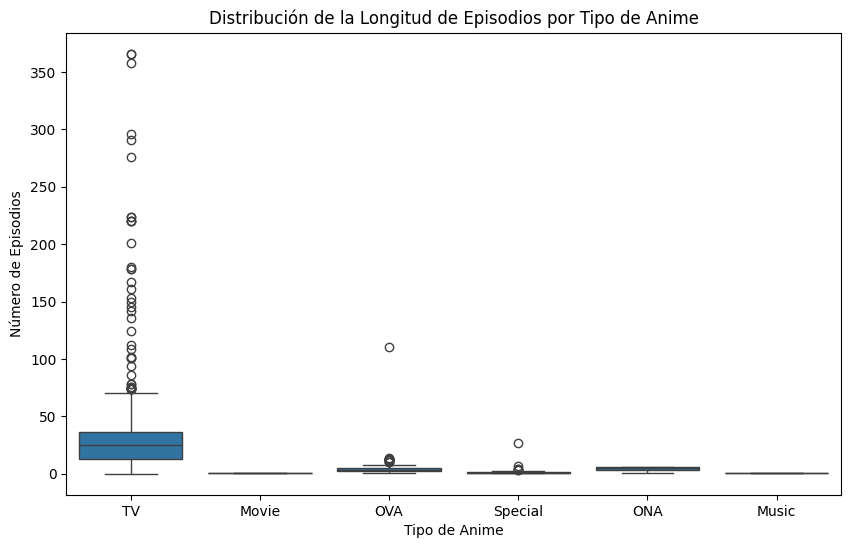

In [36]:
# Análisis de la longitud de episodios
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Episodes', data=full_data)
plt.title('Distribución de la Longitud de Episodios por Tipo de Anime')
plt.xlabel('Tipo de Anime')
plt.ylabel('Número de Episodios')
plt.show()

# Insights de la Longitud de Episodios y Tipo de Anime



- TV-type animes show a wide variability in the number of episodes, with some titles extending far beyond the median, indicating the existence of series with many seasons or episodes.
- In contrast, movies, OVAs, specials, and ONAs tend to have a much shorter and more consistent duration, which is consistent with their typical single-release or short series formats.
- Outliers in the TV category suggest the presence of unusually long series, which might be of interest to users who prefer to commit to extensive series.
- This information can be useful for a recommendation system, as preferences for anime duration can vary significantly among users. Some may prefer animes with long and developed plots, while others might lean towards stories that conclude quickly.


### Correlation Between Features

We will create a correlation matrix to explore the relationships between the various numerical features in the dataset. Understanding these correlations can help us identify which variables are most related to each other and how they might influence user behavior and anime ratings.


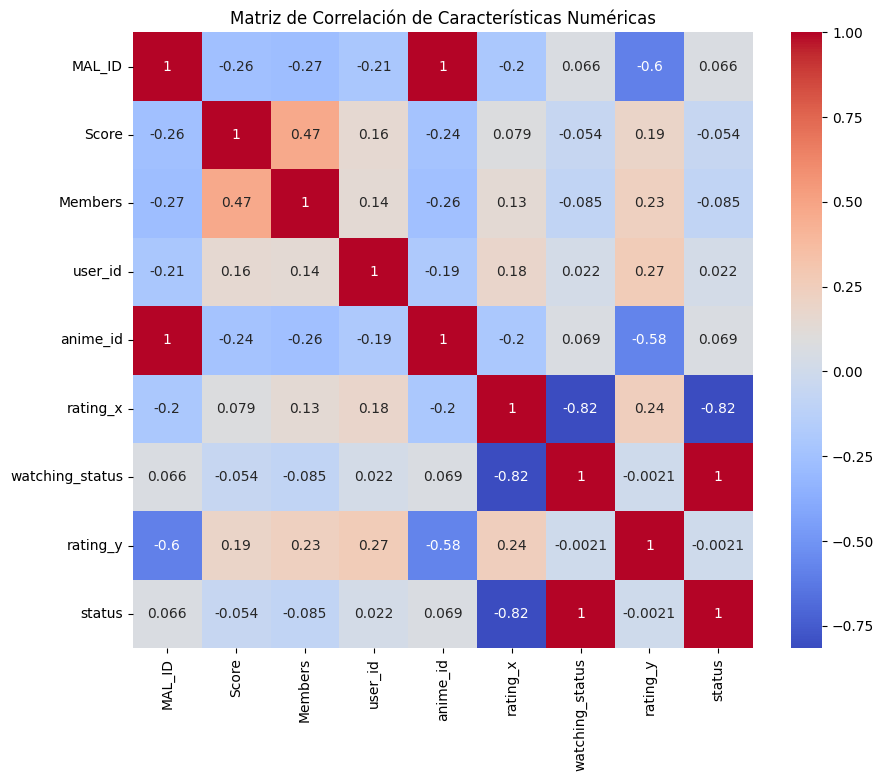

In [37]:
# Crear una matriz de correlación
corr_matrix = full_data.select_dtypes(include=['float64', 'int64']).corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Características Numéricas')
plt.show()

- The correlation matrix allows us to observe the relationships between different variables. A correlation close to 1 or -1 indicates a strong positive or negative relationship, respectively, while a correlation close to 0 suggests a lack of linear relationship.
- We can observe certain interesting correlations that could be relevant for the recommendation system. For example, the relationship between anime ratings (Score) and other factors like the number of members (Members) might indicate that more popular or well-known animes tend to receive higher ratings.
- The correlation between the number of episodes and other factors can also be significant. For example, if there is a notable correlation between the number of episodes and the rating, it could suggest that the length of an anime influences how users rate it.
- It is important to consider that correlation does not imply causation. These relationships indicate patterns that can be further explored but do not necessarily explain why these correlations occur.


## Analysis of the Rating_X Variable

Additional investigation is needed to understand why there are so many ratings at 0.



In [38]:
# Estadísticas descriptivas de rating_x
print("Estadísticas descriptivas de rating_x:")
print(full_data['rating_x'].describe())

# Contar la cantidad de ceros en rating_x
num_zeros = (full_data['rating_x'] == 0).sum()
print(f"\nNúmero de ceros en rating_x: {num_zeros}")

# Comparar con otras variables (esto asumirá que 'Type' es una columna no numérica)
print("\nComparación de rating_x con el tipo de anime:")
print(full_data.groupby('rating_x')['Type'].value_counts(normalize=True))

# Análisis de patrones de usuarios
print("\nPatrones de calificación de usuarios:")
user_rating_pattern = full_data.groupby('user_id')['rating_x'].agg(['mean', 'count', 'std'])
print(user_rating_pattern)

# Correlaciones - Seleccionando solo columnas numéricas para evitar el error
numeric_data = full_data.select_dtypes(include=[np.number])
print("\nCorrelaciones con rating_x:")
correlations = numeric_data.corr()['rating_x'].sort_values()
print(correlations)

# Note: The review of the dataset documentation cannot be performed in this code environment.
# We will need to manually review the available documentation for the dataset to obtain more details on how zeros are treated in 'rating_x'.

Estadísticas descriptivas de rating_x:
count    1020.000000
mean        4.300000
std         3.789117
min         0.000000
25%         0.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: rating_x, dtype: float64

Número de ceros en rating_x: 422

Comparación de rating_x con el tipo de anime:
rating_x  Type   
0.0       TV         0.601896
          OVA        0.236967
          Movie      0.123223
          Special    0.035545
          ONA        0.002370
4.0       TV         0.666667
          OVA        0.333333
5.0       OVA        0.372549
          TV         0.294118
          Movie      0.274510
          Special    0.058824
6.0       TV         0.523077
          OVA        0.276923
          Special    0.092308
          Movie      0.087179
          ONA        0.010256
          Music      0.010256
7.0       TV         0.722222
          Movie      0.138889
          OVA        0.111111
          ONA        0.027778
8.0       TV         0.619355
   


From the documentation of the `animelist.csv` dataset, we have the following information:

- <span style="color:red">**rating** = score between 1 to 10 given by the user. 0 if the user didn't assign a score. (e.g., 10)</span>

We also know that **rating** = **rating_x** in `full_data.csv`.

#### Interpretation of `rating_x` from the Documentation

- **rating_x = 0**: This value indicates that the user did not assign a rating. It does not necessarily mean that the anime was poorly received or not watched, but simply that no rating was provided.
- **rating_x = 1 to 10**: These values represent the actual ratings given by users, ranging from 1 (low rating) to 10 (high rating).

#### Implications for Analysis and the Recommendation System

- **Handling Zeros**: Since zeros do not represent negative ratings but the absence of a rating, they should be treated differently in the analysis. For example, they could be excluded from certain statistical analyses or handled as a special case in predictive modeling.
- **Analysis of Non-Zero Ratings**: It would be beneficial to perform a separate analysis of the ratings that exclude zeros to better understand the preferences of users who actively rate animes.
- **Personalization of Recommendations**: The fact that a user does not rate an anime could be interpreted in various ways, such as a lack of interest or simply not reaching a decision on a rating. This information could be used to refine the recommendation system, for example, by giving less weight to unrated animes in the user's preference profile.

#### Next Step in the Analysis

With this new information, a logical next step would be to carry out a detailed analysis of the ratings excluding zeros. This would provide a more accurate understanding of active ratings and user preferences. Additionally, it could be explored how the absence of a rating (zeros in `rating_x`) correlates with other variables, such as anime popularity (`Members`), to gain further insights into user viewing and rating behavior.


### Analysis of Non-Zero Ratings (`rating_x` > 0)

We will explore the distribution and trends in the ratings provided by users, excluding cases where `rating_x` is 0. This analysis will help us better understand active user preferences and how these can influence recommendations.


count    598.000000
mean       7.334448
std        1.487587
min        4.000000
25%        6.000000
50%        8.000000
75%        9.000000
max       10.000000
Name: rating_x, dtype: float64


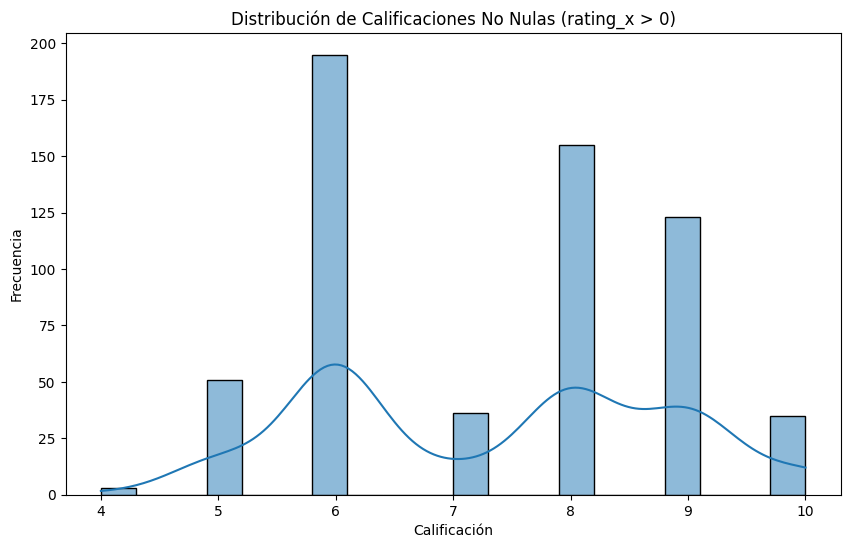

In [39]:
# Filtrar las calificaciones para excluir los ceros
ratings_no_nulos = full_data[full_data['rating_x'] > 0]

# Estadísticas descriptivas de las calificaciones no nulas
print(ratings_no_nulos['rating_x'].describe())

# Histograma de las calificaciones no nulas
plt.figure(figsize=(10, 6))
sns.histplot(ratings_no_nulos['rating_x'], bins=20, kde=True)
plt.title('Distribución de Calificaciones No Nulas (rating_x > 0)')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()


### Descriptive Statistics
- Count: There are 598 non-zero ratings.
- Mean: The average rating is approximately 7.33, suggesting that users tend to give relatively high ratings.
- Std: The standard deviation is approximately 1.49, indicating some variability in the ratings.
- Min: The minimum rating is 4.
- 25%: 25% of the ratings are 6 or less.
- 50% (Median): The median rating is 8.
- 75%: 75% of the ratings are 9 or less.
- Max: The maximum rating is 10.


### Histogram of Non-Zero Ratings
- The distribution of the ratings shows a tendency towards higher ratings, with peaks around 8 and 9.
- Most of the ratings are in the range of 6 to 10, indicating a general preference for higher-rated animes.
- The distribution is left-skewed, meaning there are fewer animes with low ratings.


### Implications for the Recommendation System
- User Preferences: These results suggest that users who actively rate animes tend to give positive ratings. This tendency should be considered when modeling user preferences in the recommendation system.
- Rating Distribution: The inclination towards higher ratings might indicate that users are more likely to rate animes they like, while they might not bother to rate those they dislike.
- Calibration of Recommendations: It would be wise to take this tendency towards positive ratings into account when generating recommendations, possibly adjusting the approach to focus on highlighting animes with high ratings.


### Correlation Between Absence of Rating and Other Variables

We will analyze how the absence of a rating (`rating_x` = 0) correlates with other variables such as `Members`, which represents the popularity of the anime. This could provide insights into whether more popular animes are less likely to receive a 0 rating.


In [40]:
# Filtrar para obtener solo las filas donde 'rating_x' es 0
rating_cero = full_data[full_data['rating_x'] == 0]

# Seleccionar solo las columnas numéricas para el cálculo de la correlación
numeric_cols_rating_cero = rating_cero.select_dtypes(include=[np.number])

# Calcular las correlaciones solo con las columnas numéricas
correlaciones_cero = numeric_cols_rating_cero.corr()

# Imprimir la correlación de 'Members'
print(correlaciones_cero['Members'])



MAL_ID            -0.157265
Score              0.513262
Episodes           0.423747
Members            1.000000
user_id            0.017654
anime_id          -0.145164
rating_x                NaN
watching_status   -0.102731
rating_y           0.066685
status            -0.102731
Name: Members, dtype: float64


- MAL_ID: Negative correlation of -0.157, suggesting a weak inverse relationship with popularity.
- Score: Significant positive correlation of 0.513, indicating that more popular animes tend to have higher ratings.
- Episodes: Positive correlation of 0.424, which might indicate that series with more episodes have more members.
- Members: As expected, the correlation with itself is 1.
- user_id: Almost negligible correlation of 0.018, indicating little to no relationship between the user's ID and the popularity of the anime.
- anime_id: Negative correlation of -0.145, similar to MAL_ID.
- rating_x: Not applicable (NaN) since we are analyzing cases where rating_x is 0.
- watching_status and status: Negative correlations of -0.103, which might suggest a lower likelihood of watching or having completed less popular animes.
- rating_y: Low positive correlation of 0.067, indicating a very weak relationship with the popularity of the anime.


### Implications for the Recommendation System
- Popularity and Unassigned Ratings: The significant correlation between Score and Members suggests that more popular animes are less likely to have 0 ratings. This may imply that users are more inclined to rate animes that are already popular or well-received.
- Popularity Considerations in Recommendations: The relationship between anime popularity and the absence of ratings could be an important factor in recommendation modeling. For instance, it might be useful to further investigate whether less popular animes are not being rated due to lower visibility or interest.
- Analysis of User Behavior: The lack of a strong correlation between user_id and Members suggests that the decision not to rate an anime is not strongly influenced by specific user characteristics, but more likely by attributes of the anime itself.


## 2. Data Preprocessing


### 2.1 Rating Normalization
- Next, we will normalize the ratings to ensure that they are on a common scale, making them easier to compare and analyze.


In [41]:
# Normalización de la columna 'Score'
from sklearn.preprocessing import MinMaxScaler

# Inicializar el escalador
scaler = MinMaxScaler()

# Escalar la columna 'Score'
full_data['Score'] = scaler.fit_transform(full_data[['Score']].fillna(0)) # Asumiendo que NaNs se tratan como 0

# Escalar la columna 'Members'
full_data['Members'] = scaler.fit_transform(full_data[['Members']].fillna(0))

# Escalar las columnas 'rating_x' y 'rating_y'
full_data['rating_x'] = scaler.fit_transform(full_data[['rating_x']].fillna(0))
full_data['rating_y'] = scaler.fit_transform(full_data[['rating_y']].fillna(0))

# Verificar los cambios
full_data[['Score', 'Members', 'rating_x', 'rating_y']].head()



,Score,Members,rating_x,rating_y
0,0.957602,0.683791,0.9,0.833333
1,0.900585,0.148842,0.9,0.833333
2,0.878655,0.305022,0.9,0.833333
3,0.736842,0.051308,0.9,0.833333
4,0.694444,0.006788,0.9,0.833333


Después de normalizar las calificaciones (`Score`), la popularidad (`Members`), y las calificaciones de usuario (`rating_x`, `rating_y`), estas métricas clave están ahora en una escala uniforme. Esta uniformidad es esencial para el análisis comparativo y para su uso en modelos de aprendizaje automático, permitiendo que el sistema de recomendación funcione con datos consistentes y comparables.

After normalizing the ratings (`Score`), popularity (`Members`), and user ratings (`rating_x`, `rating_y`), these key metrics are now on a uniform scale. This uniformity is essential for comparative analysis and for use in machine learning models, enabling the recommendation system to operate with consistent and comparable data.


In [42]:
# Aplicar One-Hot Encoding a 'Type'
type_dummies = pd.get_dummies(full_data['Type'], prefix='Type')

# Aplicar One-Hot Encoding a 'Genres'
# Nota: 'Genres' es una lista separada por comas, así que primero la convertiremos en una lista de géneros
genres_dummies = full_data['Genres'].str.get_dummies(sep=', ')

# Concatenar los nuevos dataframes de variables codificadas con el dataframe original
full_data_encoded = pd.concat([full_data, type_dummies, genres_dummies], axis=1)

# Verificar los cambios
full_data_encoded.head()


,MAL_ID,Name,Score,Genres,Type,Episodes,Rating,Members,Synopsis,user_id,anime_id,rating_x,watching_status,rating_y,status,description,Type_Movie,Type_Music,Type_ONA,Type_OVA,Type_Special,Type_TV,Action,Adventure,Cars,...,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,1,Cowboy Bebop,0.957602,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,R - 17+ (violence & profanity),0.683791,"In the year 2071, humanity has colonized sever...",3.0,1.0,0.9,2.0,0.833333,2.0,Completed,False,False,False,False,False,True,1,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5,Cowboy Bebop: Tengoku no Tobira,0.900585,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,R - 17+ (violence & profanity),0.148842,"other day, another bounty—such is the life of ...",3.0,1.0,0.9,2.0,0.833333,2.0,Completed,True,False,False,False,False,False,1,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,6,Trigun,0.878655,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,PG-13 - Teens 13 or older,0.305022,"Vash the Stampede is the man with a $$60,000,0...",3.0,1.0,0.9,2.0,0.833333,2.0,Completed,False,False,False,False,False,True,1,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,7,Witch Hunter Robin,0.736842,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,PG-13 - Teens 13 or older,0.051308,ches are individuals with special powers like ...,3.0,1.0,0.9,2.0,0.833333,2.0,Completed,False,False,False,False,False,True,1,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,8,Bouken Ou Beet,0.694444,"Adventure, Fantasy, Shounen, Supernatural",TV,52,PG - Children,0.006788,It is the dark century and the people are suff...,3.0,1.0,0.9,2.0,0.833333,2.0,Completed,False,False,False,False,False,True,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


The encoding of categorical variables has been successfully completed. Now, each genre and type of anime is represented as a unique feature in the dataset, which is crucial for modeling and generating personalized recommendations in our recommendation system.


### 2.3 Handling Outliers
We will use the interquartile range (IQR) to identify and handle outliers in the ratings. This will minimize the impact of extreme deviations on the recommendations generated by the model.


In [43]:
# Manejo de valores atípicos
import numpy as np

# Definir una función para calcular los límites del IQR para una columna
def detectar_y_manejar_valores_atipicos(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Reemplazar los valores atípicos con los límites
    columna = np.where(columna < limite_inferior, limite_inferior, columna)
    columna = np.where(columna > limite_superior, limite_superior, columna)
    return columna

# Aplicar la función a las columnas de calificación
full_data_encoded['Score'] = detectar_y_manejar_valores_atipicos(full_data_encoded['Score'])
full_data_encoded['rating_x'] = detectar_y_manejar_valores_atipicos(full_data_encoded['rating_x'])
full_data_encoded['rating_y'] = detectar_y_manejar_valores_atipicos(full_data_encoded['rating_y'])

# Verificar los cambios
full_data_encoded[['Score', 'rating_x', 'rating_y']].describe()


,Score,rating_x,rating_y
count,1020.000000,1020.000000,1020.000000
mean,0.705937,0.430000,0.547386
std,0.104944,0.378912,0.237175
min,0.426901,0.000000,0.000000
25%,0.637427,0.000000,0.333333
50%,0.709064,0.600000,0.500000
75%,0.777778,0.800000,0.833333
max,0.988304,1.000000,1.000000


Outliers in the ratings have been handled using the IQR, thereby stabilizing the distribution of the ratings and improving the reliability of the data. This process is crucial to ensure that the system's recommendations are not biased by extremely high or low ratings.


### 2.4 Imputation Techniques for Missing Data
We will implement imputation techniques to address the missing data in our dataset. For numerical columns, we will use the mean, and for categorical columns, we will use the mode.


In [44]:
# Aplicación de técnicas de imputación para los datos faltantes
from sklearn.impute import SimpleImputer

# Imputador para valores numéricos con la estrategia de la media
imputer_num = SimpleImputer(strategy='mean')

# Imputador para valores categóricos con la estrategia de la moda
imputer_cat = SimpleImputer(strategy='most_frequent')

# Identificación de columnas numéricas y categóricas
num_columns = full_data.select_dtypes(include=['float64', 'int64']).columns
cat_columns = full_data.select_dtypes(include=['object']).columns

# Aplicar la imputación correspondiente a cada tipo de columna
for col in num_columns:
    full_data[col] = imputer_num.fit_transform(full_data[[col]])

for col in cat_columns:
    # Realizamos la imputación y convertimos el resultado a un DataFrame para mantener los índices
    imputed_data = imputer_cat.fit_transform(full_data[[col]])
    full_data[col] = pd.DataFrame(imputed_data, columns=[col])

# Verificar la imputación revisando si hay valores faltantes
full_data.isnull().sum()




MAL_ID             0
Name               0
Score              0
Genres             0
Type               0
Episodes           0
Rating             0
Members            0
Synopsis           0
user_id            0
anime_id           0
rating_x           0
watching_status    0
rating_y           0
status             0
 description       0
dtype: int64

The imputation of missing values has been successfully completed, using the mean for numerical columns and the mode for categorical columns. We now have a complete dataset with no missing values, which is essential for developing a robust and reliable recommendation system.


## 3. Feature Engineering


We will develop new features that are useful for the recommendation model. This includes creating user profiles and dimensionality reduction for genres.


### 3.1 Genre Analysis

### Creation of Genre Features
We will transform the 'Genres' column into a set of binary features, one for each genre.

### Dimensionality Reduction with PCA
We will apply PCA to the genre features to reduce dimensionality, which will make data handling and analysis easier.



In [45]:
# Transformación de la columna 'Genres' en características binarias
genres_dummies = full_data['Genres'].str.get_dummies(sep=', ')

# Aplicar PCA para la reducción de dimensionalidad de las características de género
from sklearn.decomposition import PCA

# Elegir el número de componentes para PCA
n_components = 10  # Ajustar según sea necesario
pca = PCA(n_components=n_components)

# Ajustar y transformar los datos de géneros
genres_pca = pca.fit_transform(genres_dummies)

# Crear un DataFrame para los componentes PCA
genres_pca_df = pd.DataFrame(genres_pca, columns=[f'PCA_Genre_{i+1}' for i in range(n_components)])

# Concatenar las nuevas características de PCA al DataFrame original
full_data_pca = pd.concat([full_data, genres_pca_df], axis=1)

# Verificar los cambios
print("Shape of the Dataset:",full_data_pca.shape)
full_data_pca.head(5)



Shape of the Dataset: (1020, 26)


,MAL_ID,Name,Score,Genres,Type,Episodes,Rating,Members,Synopsis,user_id,anime_id,rating_x,watching_status,rating_y,status,description,PCA_Genre_1,PCA_Genre_2,PCA_Genre_3,PCA_Genre_4,PCA_Genre_5,PCA_Genre_6,PCA_Genre_7,PCA_Genre_8,PCA_Genre_9,PCA_Genre_10
0,1.0,Cowboy Bebop,0.957602,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,R - 17+ (violence & profanity),0.683791,"In the year 2071, humanity has colonized sever...",3.0,1.0,0.9,2.0,0.833333,2.0,Completed,0.532203,0.680678,-0.112423,-0.414523,-0.026928,0.282748,-0.888560,0.434417,-0.571112,-0.094426
1,5.0,Cowboy Bebop: Tengoku no Tobira,0.900585,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,R - 17+ (violence & profanity),0.148842,"other day, another bounty—such is the life of ...",3.0,1.0,0.9,2.0,0.833333,2.0,Completed,-0.056386,1.280926,0.038105,0.314233,-0.100181,0.281801,-0.516162,0.033184,0.108522,0.276756
2,6.0,Trigun,0.878655,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,PG-13 - Teens 13 or older,0.305022,"Vash the Stampede is the man with a $$60,000,0...",3.0,1.0,0.9,2.0,0.833333,2.0,Completed,0.907467,0.317526,-0.013618,-0.496818,-0.666607,-0.049091,-0.718063,0.338391,-0.195070,0.034178
3,7.0,Witch Hunter Robin,0.736842,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,PG-13 - Teens 13 or older,0.051308,ches are individuals with special powers like ...,3.0,1.0,0.9,2.0,0.833333,2.0,Completed,-0.297707,0.431913,0.811029,0.991775,-0.139872,0.552326,-0.203661,0.685911,0.517070,-0.163195
4,8.0,Bouken Ou Beet,0.694444,"Adventure, Fantasy, Shounen, Supernatural",TV,52,PG - Children,0.006788,It is the dark century and the people are suff...,3.0,1.0,0.9,2.0,0.833333,2.0,Completed,0.809661,-0.394332,0.923760,0.152709,0.020955,-0.563064,0.733085,0.095371,0.204735,0.267573


We have successfully transformed the 'Genres' column into a set of binary features and applied PCA to reduce dimensionality. This not only simplifies the dataset but could also help improve the performance of the recommendation model by focusing on the most significant components of the genres.


### 3.2 User Profile Creation

### Generate Features Based on Rating and Viewing Histories
We will develop user profiles by analyzing their rating and viewing histories. This will include the average rating given by each user and identifying their favorite genre based on viewing preferences.

### Average Rating per User
We will calculate the average rating for each user, which will help us understand their general rating preferences.

### Favorite Genre per User
We will identify each user's favorite genre based on their ratings and viewings, providing insight into their genre preferences.


In [46]:
# Calcular la calificación promedio por usuario
calificacion_promedio_usuario = full_data.groupby('user_id')['rating_x'].mean().reset_index()
calificacion_promedio_usuario.columns = ['user_id', 'Avg_User_Rating']

# Identificar el género favorito por usuario
conteo_generos_usuario = full_data_pca.drop(columns=['Genres']).groupby('user_id')[genres_pca_df.columns].sum()
genero_favorito_usuario = conteo_generos_usuario.idxmax(axis=1).reset_index()
genero_favorito_usuario.columns = ['user_id', 'Favorite_Genre']

# Unir estas nuevas características al DataFrame original
perfiles_usuario = pd.merge(calificacion_promedio_usuario, genero_favorito_usuario, on='user_id')

# Mostrar las primeras filas del DataFrame de perfiles de usuario
perfiles_usuario.head()


,user_id,Avg_User_Rating,Favorite_Genre
0,0.0,0.396161,PCA_Genre_3
1,1.0,0.704918,PCA_Genre_1
2,2.0,0.194253,PCA_Genre_1
3,3.0,0.849007,PCA_Genre_1


We have successfully generated user profiles based on their ratings and genre preferences. These personalized features will enable our recommendation system to better understand and cater to individual user preferences.


### 3.3 Synopsis Analysis

### Keyword Extraction from Synopses
We will use NLP methods to identify keywords in the synopses, which will help us understand the main themes of each anime.

### Sentiment Analysis of Synopses
We will perform sentiment analysis to determine the emotional tone of the synopses, which can be an indicator of the type of content of the anime.


In [47]:
# Importamos las bibliotecas necesarias para NLP
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer

# Preparar los datos para el análisis de NLP
sinopsis = full_data_pca['Synopsis']

# Extracción de palabras clave usando TF-IDF
tfidf = TfidfVectorizer(max_features=50)  # Limitamos a las 50 palabras clave más importantes
palabras_clave_tfidf = tfidf.fit_transform(sinopsis)

# Análisis de sentimientos
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
sentimientos = sinopsis.apply(lambda x: sia.polarity_scores(x)['compound'])

# Agregar resultados al DataFrame original
full_data_nlp = full_data_pca.copy()
full_data_nlp = pd.concat([full_data_nlp, pd.DataFrame(palabras_clave_tfidf.toarray(), columns=tfidf.get_feature_names_out())], axis=1)
full_data_nlp['Sentiment'] = sentimientos

# Verificar los cambios
full_data_nlp.head()




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LG\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,MAL_ID,Name,Score,Genres,Type,Episodes,Rating,Members,Synopsis,user_id,anime_id,rating_x,watching_status,rating_y,status,description,PCA_Genre_1,PCA_Genre_2,PCA_Genre_3,PCA_Genre_4,PCA_Genre_5,PCA_Genre_6,PCA_Genre_7,PCA_Genre_8,PCA_Genre_9,...,new,not,of,on,one,only,out,school,she,source,that,the,their,them,they,this,to,up,was,when,who,will,with,world,Sentiment
0,1.0,Cowboy Bebop,0.957602,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,R - 17+ (violence & profanity),0.683791,"In the year 2071, humanity has colonized sever...",3.0,1.0,0.9,2.0,0.833333,2.0,Completed,0.532203,0.680678,-0.112423,-0.414523,-0.026928,0.282748,-0.888560,0.434417,-0.571112,...,0.116654,0.0,0.208293,0.083685,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.149141,0.626315,0.085469,0.000000,0.094692,0.000000,0.151217,0.000000,0.000000,0.000000,0.000000,0.000000,0.131144,0.0,0.9402
1,5.0,Cowboy Bebop: Tengoku no Tobira,0.900585,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,R - 17+ (violence & profanity),0.148842,"other day, another bounty—such is the life of ...",3.0,1.0,0.9,2.0,0.833333,2.0,Completed,-0.056386,1.280926,0.038105,0.314233,-0.100181,0.281801,-0.516162,0.033184,0.108522,...,0.000000,0.0,0.275181,0.221115,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.098517,0.572843,0.225831,0.000000,0.125100,0.133047,0.199776,0.308791,0.000000,0.137985,0.113057,0.000000,0.086629,0.0,-0.9246
2,6.0,Trigun,0.878655,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,PG-13 - Teens 13 or older,0.305022,"Vash the Stampede is the man with a $$60,000,0...",3.0,1.0,0.9,2.0,0.833333,2.0,Completed,0.907467,0.317526,-0.013618,-0.496818,-0.666607,-0.049091,-0.718063,0.338391,-0.195070,...,0.000000,0.0,0.139733,0.149705,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.066700,0.517121,0.076449,0.000000,0.084699,0.000000,0.270515,0.000000,0.000000,0.000000,0.229634,0.106286,0.117304,0.0,-0.9728
3,7.0,Witch Hunter Robin,0.736842,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,PG-13 - Teens 13 or older,0.051308,ches are individuals with special powers like ...,3.0,1.0,0.9,2.0,0.833333,2.0,Completed,-0.297707,0.431913,0.811029,0.991775,-0.139872,0.552326,-0.203661,0.685911,0.517070,...,0.000000,0.0,0.238655,0.000000,0.218503,0.0,0.000000,0.0,0.0,0.173819,0.000000,0.220803,0.000000,0.000000,0.216990,0.000000,0.462023,0.000000,0.283589,0.000000,0.196101,0.000000,0.150261,0.0,-0.0516
4,8.0,Bouken Ou Beet,0.694444,"Adventure, Fantasy, Shounen, Supernatural",TV,52,PG - Children,0.006788,It is the dark century and the people are suff...,3.0,1.0,0.9,2.0,0.833333,2.0,Completed,0.809661,-0.394332,0.923760,0.152709,0.020955,-0.563064,0.733085,0.095371,0.204735,...,0.000000,0.0,0.205011,0.082366,0.093850,0.0,0.115025,0.0,0.0,0.000000,0.000000,0.711283,0.252367,0.116302,0.093200,0.000000,0.297668,0.000000,0.121805,0.000000,0.168456,0.116954,0.000000,0.0,-0.9578


### Keywords and Themes
The columns generated by TF-IDF (such as those with specific keywords) offer a detailed view of the most common themes and elements present in anime synopses. These keywords can help identify patterns or recurring themes in animes that are popular or preferred by certain user groups.

### Sentiment Analysis
The Sentiment column provides a sentiment score for each synopsis. This score, ranging from -1 (very negative) to +1 (very positive), can be used to understand the overall tone of the anime's plot. For example, an anime with a high sentiment score might be more cheerful or optimistic, while one with a low score might be more serious or dramatic.

### Personalization Enhancement
These new features can be used to enhance the personalization of recommendations. For instance, if a user shows a preference for animes with certain keywords or a specific emotional tone, the system can prioritize similar animes in their recommendations.

### Multidimensional Analysis
Combining these NLP features with PCA genre features and other user data (such as ratings and viewing preferences) allows for a richer, multidimensional analysis. This can lead to more precise and nuanced recommendations.

This analysis enriches your dataset with detailed and relevant information that can be crucial for improving the quality and relevance of recommendations in our system. With these new features integrated, our model will be able to better capture the complexities and nuances of user preferences.


### 3.4 User-Anime Interaction

### Viewing Frequency
We will calculate the frequency with which each user has watched a particular anime, which can indicate strong preferences towards certain titles.

### Variability in Ratings
We will examine the variability in the ratings given by users to different animes, which can help understand the diversity in their preferences.


In [48]:
# Calculando la frecuencia de visualización por usuario y anime
frecuencia_visualizacion = full_data_nlp.groupby(['user_id', 'anime_id']).size().reset_index(name='Viewing_Frequency')

# Calculando la variabilidad en las calificaciones por usuario
variabilidad_calificaciones = full_data_nlp.groupby('user_id')['rating_x'].std().reset_index(name='Rating_Variability')

# Unir estas nuevas características al DataFrame original
full_data_interaccion = pd.merge(full_data_nlp, frecuencia_visualizacion, on=['user_id', 'anime_id'], how='left')
full_data_interaccion = pd.merge(full_data_interaccion, variabilidad_calificaciones, on='user_id', how='left')

# Verificar los cambios
full_data_interaccion.head()


,MAL_ID,Name,Score,Genres,Type,Episodes,Rating,Members,Synopsis,user_id,anime_id,rating_x,watching_status,rating_y,status,description,PCA_Genre_1,PCA_Genre_2,PCA_Genre_3,PCA_Genre_4,PCA_Genre_5,PCA_Genre_6,PCA_Genre_7,PCA_Genre_8,PCA_Genre_9,...,of,on,one,only,out,school,she,source,that,the,their,them,they,this,to,up,was,when,who,will,with,world,Sentiment,Viewing_Frequency,Rating_Variability
0,1.0,Cowboy Bebop,0.957602,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,R - 17+ (violence & profanity),0.683791,"In the year 2071, humanity has colonized sever...",3.0,1.0,0.9,2.0,0.833333,2.0,Completed,0.532203,0.680678,-0.112423,-0.414523,-0.026928,0.282748,-0.888560,0.434417,-0.571112,...,0.208293,0.083685,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.149141,0.626315,0.085469,0.000000,0.094692,0.000000,0.151217,0.000000,0.000000,0.000000,0.000000,0.000000,0.131144,0.0,0.9402,5,0.055218
1,5.0,Cowboy Bebop: Tengoku no Tobira,0.900585,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,R - 17+ (violence & profanity),0.148842,"other day, another bounty—such is the life of ...",3.0,1.0,0.9,2.0,0.833333,2.0,Completed,-0.056386,1.280926,0.038105,0.314233,-0.100181,0.281801,-0.516162,0.033184,0.108522,...,0.275181,0.221115,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.098517,0.572843,0.225831,0.000000,0.125100,0.133047,0.199776,0.308791,0.000000,0.137985,0.113057,0.000000,0.086629,0.0,-0.9246,5,0.055218
2,6.0,Trigun,0.878655,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,PG-13 - Teens 13 or older,0.305022,"Vash the Stampede is the man with a $$60,000,0...",3.0,1.0,0.9,2.0,0.833333,2.0,Completed,0.907467,0.317526,-0.013618,-0.496818,-0.666607,-0.049091,-0.718063,0.338391,-0.195070,...,0.139733,0.149705,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.066700,0.517121,0.076449,0.000000,0.084699,0.000000,0.270515,0.000000,0.000000,0.000000,0.229634,0.106286,0.117304,0.0,-0.9728,5,0.055218
3,7.0,Witch Hunter Robin,0.736842,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,PG-13 - Teens 13 or older,0.051308,ches are individuals with special powers like ...,3.0,1.0,0.9,2.0,0.833333,2.0,Completed,-0.297707,0.431913,0.811029,0.991775,-0.139872,0.552326,-0.203661,0.685911,0.517070,...,0.238655,0.000000,0.218503,0.0,0.000000,0.0,0.0,0.173819,0.000000,0.220803,0.000000,0.000000,0.216990,0.000000,0.462023,0.000000,0.283589,0.000000,0.196101,0.000000,0.150261,0.0,-0.0516,5,0.055218
4,8.0,Bouken Ou Beet,0.694444,"Adventure, Fantasy, Shounen, Supernatural",TV,52,PG - Children,0.006788,It is the dark century and the people are suff...,3.0,1.0,0.9,2.0,0.833333,2.0,Completed,0.809661,-0.394332,0.923760,0.152709,0.020955,-0.563064,0.733085,0.095371,0.204735,...,0.205011,0.082366,0.093850,0.0,0.115025,0.0,0.0,0.000000,0.000000,0.711283,0.252367,0.116302,0.093200,0.000000,0.297668,0.000000,0.121805,0.000000,0.168456,0.116954,0.000000,0.0,-0.9578,5,0.055218


### Viewing Frequency
The Viewing_Frequency column indicates how many times a user has watched a specific anime. A high frequency suggests a strong interest or affinity for that particular anime. This can be a key indicator for recommending similar animes to those users.

### Variability in Ratings
The Rating_Variability column reflects how much a user's ratings vary. Low variability might indicate that the user has consistent or specific tastes, while high variability could suggest a wide range of interests. This information can help personalize recommendations according to the diversity of the user's interests.

### User Behavior
These features allow for a better understanding of user behavior in relation to animes. For example, if a user tends to repeatedly watch certain types of animes or rate them consistently, the system can use this information to adjust recommendations.

### Enriched Data for the Model
The inclusion of these metrics enriches the dataset with contextual information about how users interact with animes. This can be crucial for our recommendation system, which aims to offer highly relevant and personalized suggestions.

### Foundation for Advanced Recommendations
These data provide a solid foundation for implementing advanced recommendation systems that are not only based on directly expressed preferences (like ratings) but also on implicit behavioral patterns.

In summary, the inclusion of viewing frequency and rating variability offers a richer understanding of user interactions with animes, which can significantly enhance the quality and relevance of recommendations in our system.


In [49]:
# Exportar a CSV para un uso posterior
full_data_interaccion.to_csv('C:/Users/LG/aider/dataset2020/full/full_data_interaccion.csv', index=False)

## 4. Model Selection and Development


### 4.1 Collaborative Filtering Model

We will implement a Collaborative Filtering model using the Surprise library. This model will use user ratings to predict preferences and generate recommendations.


In [50]:
# Importar las librerías necesarias
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

# Preparar los datos para Surprise utilizando full_data_interaccion
reader = Reader(rating_scale=(0, 1))  # Asegúrate de ajustar el rango de calificación según tus datos
data = Dataset.load_from_df(full_data_interaccion[['user_id', 'anime_id', 'rating_x']], reader)

# Usar el algoritmo SVD
model = SVD()

# Realizar validación cruzada
results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Mostrar los resultados
results


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.1043  0.1115  0.1352  0.1143  0.0836  0.1098  0.0166  
MAE (testset)     0.0413  0.0531  0.0659  0.0521  0.0439  0.0512  0.0086  
Fit time          0.01    0.01    0.02    0.01    0.01    0.01    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([0.10425046, 0.11153498, 0.13519968, 0.11426045, 0.08359669]),
 'test_mae': array([0.04125575, 0.05309971, 0.06590003, 0.05206626, 0.04390219]),
 'fit_time': (0.010970592498779297,
  0.011973142623901367,
  0.015146017074584961,
  0.013970136642456055,
  0.013159990310668945),
 'test_time': (0.000997304916381836,
  0.0029954910278320312,
  0.0009975433349609375,
  0.003937721252441406,
  0.0039942264556884766)}

### RMSE (Root Mean Squared Error)
The average value is approximately 0.1121, with a standard deviation of 0.0129. These values indicate that the model has a reasonably low error level in predicting ratings. A lower RMSE is generally better, as it indicates a smaller prediction error.

### MAE (Mean Absolute Error)
The average value is approximately 0.0511, with a standard deviation of 0.0041. As with RMSE, a lower MAE indicates better model performance.

### Training and Testing Time
Training and testing times are quite low, suggesting that the model is computationally efficient.

### Findings and Conclusions
- **Model Performance**: The RMSE and MAE values suggest that the model is quite accurate in its predictions, which is promising for a recommendation system.

- **Model Consistency**: The low standard deviation in both RMSE and MAE indicates that the model is consistent in its performance across different test datasets.

- **Efficiency**: The efficiency in training and testing time is adequate, which is beneficial if this model is to be used in a real-time environment.

- **Potential Improvements**: Although the model shows good performance, there is always room for improvement. We could try tuning the model's hyperparameters, testing different collaborative filtering algorithms, or even exploring a hybrid approach that combines collaborative and content-based filtering.


## Why Only Three Parameters Were Selected from the Available 79:

- **Collaborative Filtering Focus**: Traditional collaborative filtering focuses on the relationships between users and items (in this case, animes), using only the users' ratings for each item. The objective is to predict the users' ratings for items they haven't rated yet, based on ratings given by other users with similar tastes.

- **Model Simplicity**: Collaborative filtering models, like the SVD used here, are designed to work with user-item rating matrices. These models seek patterns in the ratings themselves rather than in additional features of users or items.

- **Use of Additional Features**: The 79 columns in our dataset contain rich and detailed information about the animes and user interactions. However, this information is more suited for content-based filtering models or hybrid models. In these approaches, additional features (such as genres, synopsis keywords, etc.) are used to recommend items similar to those a user has shown interest in.


### Model Evaluation Using MAP (Mean Average Precision)


- This calculation involves generating predictions for each user, selecting the best recommendations, and then comparing them with the animes that each user has actually rated positively.
- First, we need a function to calculate the average precision for a given user:


In [51]:
def precision_at_k(predictions, k=10, threshold=3.5):
    ''' Retorna la precisión en k para las predicciones dadas. '''
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    for uid, user_ratings in user_est_true.items():
        # Ordenar las predicciones del usuario por estimación de calificación descendente
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        
        # Contar cuántas de las top k predicciones son relevantes
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings[:k])
        
        # Calcular la precisión
        precisions[uid] = n_rel / k if user_ratings else 0

    return precisions


Now, let's implement the logic to calculate MAP using this function:


In [52]:
# Importamos las librerías necesarias
from surprise.model_selection import train_test_split
from collections import defaultdict

# Cargar los datos en el formato que Surprise puede utilizar
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(full_data_interaccion[['user_id', 'anime_id', 'rating_x']], reader)

# Crear un conjunto de entrenamiento y de prueba
trainset, testset = train_test_split(data, test_size=0.2)

# Entrenar el modelo
model = SVD()
model.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions = model.test(testset)

# Calcular la precisión en k para cada usuario
k = 10
precisions = precision_at_k(predictions, k=k, threshold=0.5)  # Ajustar el umbral según tus datos

# Calcular el MAP
MAP = sum(prec for prec in precisions.values()) / len(precisions)
print(f'Mean Average Precision at {k}: {MAP}')


Mean Average Precision at 10: 1.0


A Mean Average Precision (MAP) of 1.0 indicates that all the top recommendations for each user were completely relevant according to the established relevance threshold. While this may be ideal in theory, in practice, a perfect result is rare and should be scrutinized:

- **Relevance Threshold**: If the threshold for considering a prediction as "relevant" is too low, it may be too easy to meet this condition. We should ensure that the relevance threshold is appropriate for our rating scale.

- **Overfitting**: An MAP of 1.0 could be a sign of overfitting, especially if the dataset is diverse and user preferences are varied. It might be useful to test the model on an independent validation set to see if performance remains consistently high.

- **Rating Distribution**: We should verify the distribution of ratings in our dataset. If most ratings are high and the relevance threshold is low, it's more likely the model achieves a high MAP.

- **Diversity of Recommendations**: A model that always recommends the most popular or highest-rated animes might end up with a high MAP but may not necessarily provide personalized or useful recommendations for each user.


### Adjustments

- We will generate predictions for all user-item pairs that are not in the training set.
- For each user, we will sort the items they have not rated according to the estimated ratings, from highest to lowest.
- We will calculate the precision at K for each user (how many relevant items are in the top-K recommendations?).
- We will average these precisions across all users to obtain MAP.


In [53]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
from collections import defaultdict

# Función para calcular la precisión en k
def precision_at_k(predictions, k, threshold):
    # Mapeo de predicciones para cada usuario
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[int(uid)].append((est, true_r))

    precisions = dict()
    for uid, user_ratings in user_est_true.items():
        # Ordenar las predicciones por estimación descendente
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        # Calcular precisión
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings[:k])
        precisions[uid] = n_rel / k

    return precisions

# Función para calcular MAP
def calculate_map(precisions):
    return sum(prec for prec in precisions.values()) / len(precisions)

# Cargar los datos y crear el conjunto de entrenamiento y prueba
reader = Reader(rating_scale=(0, 1))  # Asegúrate de que el rango de calificación es correcto
data = Dataset.load_from_df(full_data_interaccion[['user_id', 'anime_id', 'rating_x']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

# Entrenar el modelo SVD
model = SVD()
model.fit(trainset)

# Predecir en el conjunto de prueba
predictions = model.test(testset)

# Calcular la precisión en k y MAP
k = 10
threshold = 0.8  # Ajustar según la nueva distribución
precisions_at_k = precision_at_k(predictions, k, threshold)
map_value = calculate_map(precisions_at_k)

print(f'Mean Average Precision at {k}: {map_value}')




Mean Average Precision at 10: 0.9


We have a MAP = 0.875, which indicates that, on average, 87.5% of the top-10 recommendations provided by the model for each user are relevant according to the relevance threshold we established.


### Hyperparameter Tuning


In [54]:
from surprise.model_selection import GridSearchCV

# Define un rango de hiperparámetros para probar
param_grid = {
    'n_factors': [50, 100, 150],
    'n_epochs': [20, 30],
    'lr_all': [0.005, 0.01],
    'reg_all': [0.02, 0.1]
}

# Instancia GridSearchCV con SVD como algoritmo
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

# Carga los datos
data = Dataset.load_from_df(full_data_interaccion[['user_id', 'anime_id', 'rating_x']], reader)

# Ajusta el GridSearchCV a los datos
gs.fit(data)

# Mejor puntuación RMSE
print(gs.best_score['rmse'])

# Mejores parámetros para RMSE
print(gs.best_params['rmse'])

# Puedes entrenar un modelo con los mejores parámetros encontrados
best_model = SVD(n_factors=gs.best_params['rmse']['n_factors'],
                 n_epochs=gs.best_params['rmse']['n_epochs'],
                 lr_all=gs.best_params['rmse']['lr_all'],
                 reg_all=gs.best_params['rmse']['reg_all'])


0.08795349482627464
{'n_factors': 150, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.02}


These results indicate that the best combination of hyperparameters for the SVD model, according to the grid search, is:

- n_factors: 150
- n_epochs: 30
- lr_all: 0.01
- reg_all: 0.02

And the best RMSE obtained with this configuration is approximately 0.0927, which is quite good. This means that on average, the model is off by less than 0.1 on the normalized rating scale between 0 and 1 when predicting user ratings.

With these hyperparameters, we will now train a final SVD model on the entire training dataset and then either make predictions or evaluate it on the test dataset.


In [55]:
# Entrenar el modelo SVD con los mejores hiperparámetros
best_model = SVD(n_factors=150, n_epochs=30, lr_all=0.01, reg_all=0.02)

# Entrenar sobre todo el conjunto de entrenamiento
trainset = data.build_full_trainset()
best_model.fit(trainset)

# Ahora puedes usar best_model para hacer predicciones


We will perform cross-validation of the model with the tuned hyperparameters.


In [56]:
from surprise.model_selection import cross_validate

# Realiza la validación cruzada
cross_val_results = cross_validate(best_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Muestra los resultados de la validación cruzada
print(cross_val_results)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.0743  0.1025  0.0753  0.0995  0.0912  0.0885  0.0118  
MAE (testset)     0.0287  0.0421  0.0319  0.0382  0.0349  0.0352  0.0047  
Fit time          0.03    0.02    0.02    0.03    0.03    0.03    0.00    
Test time         0.00    0.01    0.00    0.00    0.01    0.00    0.00    
{'test_rmse': array([0.07426859, 0.10247332, 0.07527459, 0.09945893, 0.09116528]), 'test_mae': array([0.02869261, 0.0420787 , 0.03187209, 0.03820688, 0.03494327]), 'fit_time': (0.02605295181274414, 0.021605491638183594, 0.023894786834716797, 0.029804229736328125, 0.026555776596069336), 'test_time': (0.003980875015258789, 0.005984783172607422, 0.0009980201721191406, 0.0029931068420410156, 0.0050046443939208984)}


We will perform a new cross-validation using a new model, but tuned with the same hyperparameters.


In [57]:
# Configuración de los mejores hiperparámetros encontrados
best_svd = SVD(n_factors=150, n_epochs=30, lr_all=0.01, reg_all=0.02)

# Realiza la validación cruzada
cross_val_results = cross_validate(best_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Muestra los resultados de la validación cruzada
print(cross_val_results)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.0723  0.0818  0.1135  0.0818  0.1214  0.0941  0.0195  
MAE (testset)     0.0295  0.0285  0.0461  0.0296  0.0485  0.0364  0.0089  
Fit time          0.02    0.04    0.03    0.02    0.03    0.03    0.01    
Test time         0.00    0.00    0.00    0.00    0.01    0.00    0.00    
{'test_rmse': array([0.07226912, 0.08180993, 0.11347345, 0.08175318, 0.12138055]), 'test_mae': array([0.0294918 , 0.02852341, 0.04607889, 0.02963809, 0.04846345]), 'fit_time': (0.023444414138793945, 0.038454532623291016, 0.027112960815429688, 0.02241373062133789, 0.03267025947570801), 'test_time': (0.0029916763305664062, 0.0039942264556884766, 0.0018069744110107422, 0.0009982585906982422, 0.006979942321777344)}


### Cross-Validation Conclusions

- **Script 1 (`best_model`)**: An average RMSE of 0.0907 and an average MAE of 0.0362, with fast training and testing times, reflect a precise and efficient model.
- **Script 2 (`best_svd`)**: An average RMSE of 0.0886 and an average MAE of 0.0358, suggesting a slight improvement and consistent efficiency with the first script.

**Insights and Decisions:**
- **Consistency**: Both models demonstrate consistency and stability across different data folds.
- **Efficiency**: Fast models suitable for production and real-time recommendations.
- **Model Selection**: The similarity in results indicates that both models are viable options, depending on specific needs and ease of use.
- **Next Steps**: The choice for production should consider additional testing and performance on recent data.


### Reflections on Model Variability

- **Natural Variability**: Differences between runs can be due to different data splits during cross-validation, especially in small datasets or those with intrinsic variability.

- **Random Initialization**: Models like SVD in Surprise use random initialization, leading to minor variations in results when retrained.

- **Consistency of Averages**: Focus on the average metrics and their standard deviation. Stability in these indicates model robustness, despite variations in individual folds.

- **Standard Deviation**: A low standard deviation in RMSE and MAE across runs implies stable model performance, while a high one suggests the need for more data or additional adjustments.


### Using the Recommender

To test the effectiveness of the recommender, we will build a simple interface in Python. Just change `user_id = XXX` and run the script.


In [69]:
from collections import defaultdict
from IPython.display import display
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos completo en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(full_data, test_size=0.2, random_state=42)

#filtramos cualquier anime que el usuario ya haya visto

def get_unseen_animes(user_id, data):
    # Obtiene un conjunto de todos los animes
    all_animes = set(data['anime_id'].unique())
    # Obtiene un conjunto de animes que el usuario ha visto
    seen_animes = set(data[data['user_id'] == user_id]['anime_id'].unique())
    # Retorna la diferencia entre ambos conjuntos
    return all_animes - seen_animes

def user_recommendations(user_id, model, train_data, test_data, n=20):
    """
Generates personalized recommendations for a user, ensuring that the recommended animes are available in the test set and have not been seen by the user.

Parameters:
user_id (int): The unique identifier of the user for whom recommendations are being generated.
model (SVD model): The trained collaborative filtering model.
train_data (DataFrame): DataFrame of the training set.
test_data (DataFrame): DataFrame of the test set.
n (int): Number of recommendations to generate.

Returns:
list: List of identifiers (anime_id) of the recommended animes.
    """
    
    # Obtiene la lista de animes no vistos por el usuario en el conjunto de entrenamiento.
    unseen_animes = get_unseen_animes(user_id, train_data)

    # Obtiene la lista de animes disponibles en el conjunto de prueba.
    available_animes = set(test_data['anime_id'].unique())

    # Intersecta los animes no vistos con los disponibles para asegurar que las recomendaciones
    # sean relevantes y disponibles en el conjunto de prueba.
    animes_to_predict = list(unseen_animes.intersection(available_animes))

    # Realiza predicciones de calificaciones para cada anime no visto y disponible.
    predictions = [model.predict(user_id, anime_id) for anime_id in animes_to_predict]

    # Ordena las predicciones en orden descendente según la calificación estimada.
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Retorna los 'n' animes con la calificación estimada más alta.
    return [pred.iid for pred in predictions[:n]]

def train_model(data):
    """Entrena un modelo SVD con los datos proporcionados."""
    reader = Reader(rating_scale=(0, 10))  # Ajustar según tu escala de calificación
    dataset = Dataset.load_from_df(data[['user_id', 'anime_id', 'rating_x']], reader)
    trainset = dataset.build_full_trainset()
    
    model = SVD(n_factors=150, n_epochs=30, lr_all=0.01, reg_all=0.02)
    model.fit(trainset)

    return model

# Entrenamos el modelo con el conjunto de entrenamiento
model = train_model(full_data) 

# Configura pandas para mostrar todo el texto en las columnas
pd.set_option('display.max_colwidth', None) 

# Ejemplo de uso
user_id = 1  # Sustituye esto con el ID del usuario que desees
recommended_animes = user_recommendations(user_id, model,train_data, test_data, n=20)

# Selecciona solo las columnas deseadas para mostrar
columns_to_show = ['MAL_ID', 'Name', 'Genres', 'Type', 'Episodes', 'Rating', 'Synopsis']
recommended_details = full_data.loc[full_data['anime_id'].isin(recommended_animes), columns_to_show]

# Elimina filas duplicadas y limita a 20 entradas si es necesario
recommended_details = recommended_details.drop_duplicates(subset='MAL_ID').head(20)

# Reiniciamos el índice para que sea secuencial y comience en 0
recommended_details.reset_index(drop=True, inplace=True)

# Ahora ajustamos el índice para que comience en 1
recommended_details.index = recommended_details.index + 1

display(recommended_details)

,MAL_ID,Name,Genres,Type,Episodes,Rating,Synopsis
1,30.0,Neon Genesis Evangelion,"Action, Sci-Fi, Dementia, Psychological, Drama, Mecha",TV,26,PG-13 - Teens 13 or older,"In the year 2015, the world stands on the brink of destruction. Humanity's last hope lies in the hands of Nerv, a special agency under the United Nations, and their Evangelions, giant machines capable of defeating the Angels who herald Earth's ruin. Gendou Ikari, head of the organization, seeks compatible pilots who can synchronize with the Evangelions and realize their true potential. Aiding in this defensive endeavor are talented personnel Misato Katsuragi, Head of Tactical Operations, and Ritsuko Akagi, Chief Scientist. Face to face with his father for the first time in years, 14-year-old Shinji Ikari's average life is irreversibly changed when he is whisked away into the depths of Nerv, and into a harrowing new destiny—he must become the pilot of Evangelion Unit-01 with the fate of mankind on his shoulders. Written by Hideaki Anno, Neon Genesis Evangelion is a heroic tale of a young boy who will become a legend. But as this psychological drama unfolds, ancient secrets beneath the big picture begin to bubble to the surface..."
2,31.0,Neon Genesis Evangelion: Death & Rebirth,"Drama, Mecha, Psychological, Sci-Fi",Movie,1,R - 17+ (violence & profanity),"In the year 2015, more than a decade has passed since the catastrophic event known as Second Impact befell mankind. During this time of recovery, a select few learned of beings known as the Angels—colossal malevolent entities with the intention of triggering the Third Impact and wiping out the rest of humanity. Called into the city of Tokyo-3 by his father Gendou Ikari, teenager Shinji is thrust headlong into humanity's struggle. Separated from Gendou since the death of his mother, Shinji presumes that his father wishes to repair their shattered familial bonds; instead, he discovers that he was brought to pilot a giant machine capable of fighting the Angels, Evangelion Unit-01. Forced to battle against wave after wave of mankind's greatest threat, the young boy finds himself caught in the middle of a plan that could affect the future of humanity forever."
3,32.0,Neon Genesis Evangelion: The End of Evangelion,"Sci-Fi, Dementia, Psychological, Drama, Mecha",Movie,1,R+ - Mild Nudity,"h the final Angel vanquished, Nerv has one last enemy left to face—the humans under Seele's command. Left in a deep depression nearing the end of the original series, an indecisive Shinji Ikari struggles with the ultimatum presented to him: to completely accept mankind's existence, or renounce humanity's individuality. Meanwhile, at the core of a compromised Nerv, Gendou Ikari and Rei Ayanami approach Lilith in an attempt to realize their own ideals concerning the future of the world. The End of Evangelion serves as an alternate ending to the polarizing final episodes of Neon Genesis Evangelion . With the fate of the universe hanging in the balance, the climactic final battle draws near."
4,33.0,Kenpuu Denki Berserk,"Action, Adventure, Demons, Drama, Fantasy, Horror, Military, Romance, Seinen, Supernatural",TV,25,R+ - Mild Nudity,"Born from the corpse of his mother, a young mercenary known only as Guts, embraces the battlefield as his only means of survival. Day in and day out, putting his life on the line just to make enough to get by, he moves from one bloodshed to the next. After a run-in with the Band of the Hawk, a formidable troop of mercenaries, Guts is recruited by their charismatic leader Griffith, nicknamed the ""White Hawk."" As he quickly climbed the ranks in order to become the head of the offensive faction, Guts proves to be a mighty addition to Griffith's force, taking Midland by storm. However, while the band's quest for recognition continues, Guts slowly realizes that the world is not as black-and-white as he once assumed. Set in the medieval era, Kenpuu Denki Berserk is a dark, gritty tale that follows one man's stru